# **Kütühaneler**

In [21]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.linear_model import LinearRegression
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import mean_squared_error, r2_score
import warnings
warnings.filterwarnings('ignore')

In [22]:
df = pd.read_csv("/content/drive/MyDrive/Colab çalışma/Neıman/CarPrice_Prediction/CarPrice_Assignment.csv")

# **Veri Keşfi ve Temizleme**

In [23]:
# İlk birkaç satırı göster
print(df.head())

# Veri hakkında genel bilgi
print(df.info())

# Eksik değerleri kontrol et
print(df.isnull().sum())

   car_ID  symboling                   CarName fueltype aspiration doornumber  \
0       1          3        alfa-romero giulia      gas        std        two   
1       2          3       alfa-romero stelvio      gas        std        two   
2       3          1  alfa-romero Quadrifoglio      gas        std        two   
3       4          2               audi 100 ls      gas        std       four   
4       5          2                audi 100ls      gas        std       four   

       carbody drivewheel enginelocation  wheelbase  ...  enginesize  \
0  convertible        rwd          front       88.6  ...         130   
1  convertible        rwd          front       88.6  ...         130   
2    hatchback        rwd          front       94.5  ...         152   
3        sedan        fwd          front       99.8  ...         109   
4        sedan        4wd          front       99.4  ...         136   

   fuelsystem  boreratio  stroke compressionratio horsepower  peakrpm citympg  \

# **Kategorik Verilerin Dönüşümü**

In [24]:
# car_ID ve CarName kolonlarını düşürüyoruz
df.drop(['car_ID', 'CarName'], axis=1, inplace=True)

# Kategorik değişkenleri one-hot encoding ile sayısal hale getirme
df = pd.get_dummies(df, drop_first=True)

# **Data seti Train ve Test ' e ayırma**

In [25]:
# Bağımlı ve bağımsız değişkenlerin ayrılması
X = df.drop('price', axis=1)
y = df['price']

# Eğitim ve test setlerinin ayrılması
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# **Model Eğitimi= Lineer regressin**

In [26]:
# Lineer Regresyon Modeli
lr = LinearRegression()
lr.fit(X_train, y_train)

# Tahminler
y_pred_lr = lr.predict(X_test)

# Değerlendirme
mse_lr = mean_squared_error(y_test, y_pred_lr)
r2_lr = r2_score(y_test, y_pred_lr)

print(f"Linear Regression MSE: {mse_lr}")
print(f"Linear Regression R2: {r2_lr}")

Linear Regression MSE: 8482008.484371819
Linear Regression R2: 0.8925566700320243


# **Model Eğitimi= Random Forest**

In [27]:
# Random Forest Modeli
rf = RandomForestRegressor(n_estimators=100, random_state=42)
rf.fit(X_train, y_train)

# Tahminler
y_pred_rf = rf.predict(X_test)

# Değerlendirme
mse_rf = mean_squared_error(y_test, y_pred_rf)
r2_rf = r2_score(y_test, y_pred_rf)

print(f"Random Forest MSE: {mse_rf}")
print(f"Random Forest R2: {r2_rf}")

Random Forest MSE: 3314701.736754924
Random Forest R2: 0.9580119976178074


# **Model İyileştirme**

In [28]:
# Hiperparametre ayarı için Grid Search
param_grid = {
    'n_estimators': [100, 200, 300],
    'max_features': ['auto', 'sqrt', 'log2'],
    'max_depth': [10, 20, 30, None],
    'min_samples_split': [2, 5, 10],
    'min_samples_leaf': [1, 2, 4]
}

grid_search = GridSearchCV(estimator=rf, param_grid=param_grid, cv=3, n_jobs=-1, verbose=2)
grid_search.fit(X_train, y_train)

# En iyi parametreler ile yeniden eğitim
best_rf = grid_search.best_estimator_
best_rf.fit(X_train, y_train)

# Tahminler
y_pred_best_rf = best_rf.predict(X_test)

# Değerlendirme
mse_best_rf = mean_squared_error(y_test, y_pred_best_rf)
r2_best_rf = r2_score(y_test, y_pred_best_rf)

print(f"Best Random Forest MSE: {mse_best_rf}")
print(f"Best Random Forest R2: {r2_best_rf}")

Fitting 3 folds for each of 324 candidates, totalling 972 fits
Best Random Forest MSE: 3239638.042841328
Best Random Forest R2: 0.9589628447253804


# **Sonuçlar**

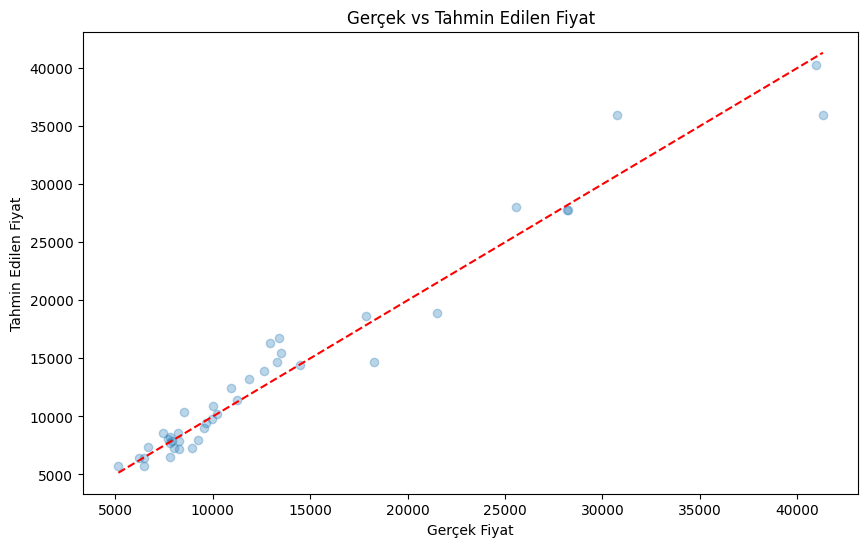

In [29]:
# Gerçek vs Tahmin Değerleri
plt.figure(figsize=(10, 6))
plt.scatter(y_test, y_pred_best_rf, alpha=0.3)
plt.plot([y_test.min(), y_test.max()], [y_test.min(), y_test.max()], '--r')
plt.xlabel('Gerçek Fiyat')
plt.ylabel('Tahmin Edilen Fiyat')
plt.title('Gerçek vs Tahmin Edilen Fiyat')
plt.show()

# **Deneme**

In [30]:
def predict_car_price(input_data):
    """
    Bu fonksiyon, kullanıcının girdiği özelliklere göre araba fiyatını tahmin eder.
    input_data: dictionary, araba özellikleri
    """
    input_df = pd.DataFrame([input_data])
    input_df = pd.get_dummies(input_df)
    input_df = input_df.reindex(columns=X.columns, fill_value=0)

    prediction = best_rf.predict(input_df)
    return prediction[0]

# Örnek kullanım
example_input = {
    'symboling': 3,
    'fueltype': 'gas',
    'aspiration': 'std',
    'doornumber': 'four',
    'carbody': 'sedan',
    'drivewheel': 'fwd',
    'enginelocation': 'front',
    'wheelbase': 88.6,
    'carlength': 168.8,
    'carwidth': 64.1,
    'carheight': 48.8,
    'curbweight': 2548,
    'enginetype': 'dohc',
    'cylindernumber': 'four',
    'enginesize': 130,
    'fuelsystem': 'mpfi',
    'boreratio': 3.47,
    'stroke': 2.68,
    'compressionratio': 9.0,
    'horsepower': 111,
    'peakrpm': 5000,
    'citympg': 21,
    'highwaympg': 27
}

predicted_price = predict_car_price(example_input)
print(f"Tahmin edilen araba fiyatı: ${predicted_price:.2f}")

Tahmin edilen araba fiyatı: $13939.96
